# Visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Get dataset
data = pd.read_csv('data/preprocessed_dataset.csv')

In [3]:
data.head()

,FRUTDA1_,HTIN4,PDIABTST,PAFREQ2_,LASTSMK2,TRNSGNDR,PREDIAB1,HAVARTH3,ACTIN11_,BLOODCHO,...,INTERNET,SEX,CVDSTRK3,GENHLTH,DIFFWALK,_AGEG5YR,BPHIGH4,EMPLOY1,CVDCRHD4,CVDINFR4
0,33.0,70.0,1.0,NaN,2.0,NaN,3.0,1.0,NaN,1.0,...,2.0,2.0,2.0,5.0,1.0,9.0,1.0,8.0,2.0,0
1,17.0,68.0,2.0,2800.0,NaN,NaN,3.0,2.0,1.0,1.0,...,1.0,2.0,2.0,3.0,2.0,7.0,3.0,3.0,2.0,0
2,100.0,67.0,2.0,NaN,NaN,NaN,3.0,1.0,NaN,1.0,...,2.0,2.0,2.0,5.0,1.0,9.0,1.0,8.0,2.0,0
3,200.0,64.0,1.0,NaN,NaN,NaN,3.0,1.0,NaN,1.0,...,1.0,2.0,2.0,5.0,2.0,9.0,3.0,8.0,2.0,0
4,100.0,62.0,1.0,7000.0,NaN,NaN,3.0,1.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,11.0,1.0,2.0,2.0,0


In [4]:
data.shape

(439227, 51)

In [5]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439227 entries, 0 to 439226
Data columns (total 51 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   FRUTDA1_  403023 non-null  float64
 1   HTIN4     422185 non-null  float64
 2   PDIABTST  82358 non-null   float64
 3   PAFREQ2_  194076 non-null  float64
 4   LASTSMK2  121540 non-null  float64
 5   TRNSGNDR  166183 non-null  float64
 6   PREDIAB1  82358 non-null   float64
 7   HAVARTH3  439226 non-null  float64
 8   ACTIN11_  290363 non-null  float64
 9   BLOODCHO  439227 non-null  float64
 10  MARITAL   439227 non-null  float64
 11  CASTHDX2  52151 non-null   float64
 12  DIABETE3  439220 non-null  float64
 13  MAXDRNKS  209342 non-null  float64
 14  BLIND     428181 non-null  float64
 15  HADSGCO1  39134 non-null   float64
 16  DRNK3GE5  209745 non-null  float64
 17  HADMAM    22714 non-null   float64
 18  JOINPAIN  132825 non-null  float64
 19  USENOW3   424494 non-null  float64
 20  INCO

## Gender - Heart Attack Relationship

In [6]:
# See how many people have had heart attacks based on gender
plt.figure(figsize=(15,20))
df = data.groupby(['SEX','CVDINFR4']).size()

<Figure size 1080x1440 with 0 Axes>

In [7]:
df

SEX  CVDINFR4
1.0  0           171374
     1            14484
2.0  0           242381
     1            10988
dtype: int64

In [8]:
data_to_plot = df.unstack()

In [9]:
data_to_plot

CVDINFR4,0,1
SEX,,
1.0,171374,14484
2.0,242381,10988


In [10]:
data_to_plot_transpose = data_to_plot.transpose()

In [11]:
data_to_plot_transpose

SEX,1.0,2.0
CVDINFR4,,
0,171374,242381
1,14484,10988


In [12]:
data_to_plot_transpose_percent = data_to_plot_transpose.div(data_to_plot_transpose.sum())

In [13]:
data_to_plot_transpose_percent

SEX,1.0,2.0
CVDINFR4,,
0,0.92207,0.956632
1,0.07793,0.043368


In [14]:
data_to_plot_percent = data_to_plot_transpose_percent.transpose()

In [15]:
data_to_plot_percent

CVDINFR4,0,1
SEX,,
1.0,0.922070,0.077930
2.0,0.956632,0.043368


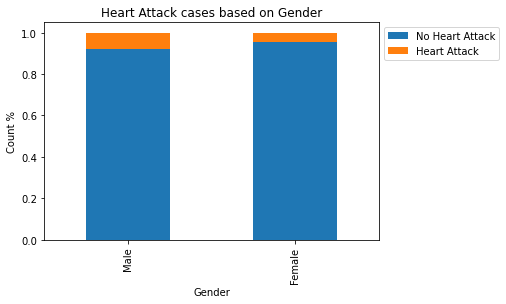

In [16]:
data_to_plot_percent.plot(kind='bar',stacked=True).legend(["No Heart Attack", "Heart Attack"], loc='upper left', bbox_to_anchor=(1,1), ncol=1)
positions = (0, 1)
labels = ("Male", "Female")
plt.xticks(positions, labels)
plt.xlabel('Gender')
plt.ylabel('Count %')
plt.title("Heart Attack cases based on Gender")

plt.show()

In [17]:
# According to this dataset Males get more heart attacks than Females

## High Blood Pressure - Heart Attack Relationship

In [18]:
# Convert values
data['BPHIGH4'].replace(2, 1, inplace=True) 
data['BPHIGH4'].replace(3, 0, inplace=True)
data['BPHIGH4'].replace(4, 1, inplace=True)
data['BPHIGH4'].replace(7, np.nan, inplace=True)
data['BPHIGH4'].replace(9, np.nan, inplace=True)

In [19]:
# See how many people have had heart attacks based on they having high blood pressure
plt.figure(figsize=(15,20))
df2 = data.groupby(['BPHIGH4','CVDINFR4']).size()

<Figure size 1080x1440 with 0 Axes>

In [20]:
df2

BPHIGH4  CVDINFR4
0.0      0           247221
         1             6319
1.0      0           165379
         1            19050
dtype: int64

In [21]:
data_to_plot2 = df2.unstack()

In [22]:
data_to_plot2

CVDINFR4,0,1
BPHIGH4,,
0.0,247221,6319
1.0,165379,19050


In [23]:
data_to_plot_transpose2 = data_to_plot2.transpose()

In [24]:
data_to_plot_transpose2

BPHIGH4,0.0,1.0
CVDINFR4,,
0,247221,165379
1,6319,19050


In [25]:
data_to_plot_transpose_percent2 = data_to_plot_transpose2.div(data_to_plot_transpose2.sum())

In [26]:
data_to_plot_transpose_percent2

BPHIGH4,0.0,1.0
CVDINFR4,,
0,0.975077,0.896708
1,0.024923,0.103292


In [27]:
data_to_plot_percent2 = data_to_plot_transpose_percent2.transpose()

In [28]:
data_to_plot_percent2

CVDINFR4,0,1
BPHIGH4,,
0.0,0.975077,0.024923
1.0,0.896708,0.103292


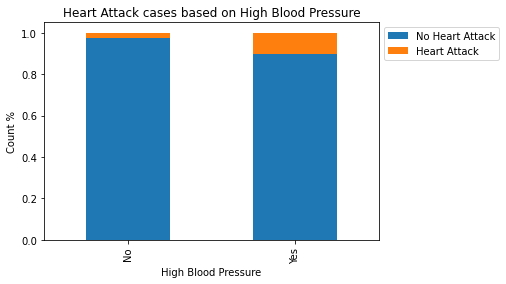

In [29]:
data_to_plot_percent2.plot(kind='bar',stacked=True).legend(["No Heart Attack", "Heart Attack"], loc='upper left', bbox_to_anchor=(1,1), ncol=1)
positions = (0, 1)
labels = ("No", "Yes")
plt.xticks(positions, labels)
plt.xlabel('High Blood Pressure')
plt.ylabel('Count %')
plt.title("Heart Attack cases based on High Blood Pressure")

plt.show()

In [30]:
# According to this dataset people with High Blood Pressure get more heart attacks than those with no High Blood Pressure

## High Blood  Cholesterol - Heart Attack Relationship

In [31]:
# Convert values
data['TOLDHI2'].replace(2, 0, inplace=True)
data['TOLDHI2'].replace(7, np.nan, inplace=True)
data['TOLDHI2'].replace(9, np.nan, inplace=True)

In [32]:
# See how many people have had heart attacks based on they having high blood cholesterol
plt.figure(figsize=(15,20))
df3 = data.groupby(['TOLDHI2','CVDINFR4']).size()

<Figure size 1080x1440 with 0 Axes>

In [33]:
data_to_plot3 = df3.unstack()

In [34]:
data_to_plot3

CVDINFR4,0,1
TOLDHI2,,
0.0,210617,7493
1.0,142284,16637


In [35]:
data_to_plot_transpose3 = data_to_plot3.transpose()

In [36]:
data_to_plot_transpose3

TOLDHI2,0.0,1.0
CVDINFR4,,
0,210617,142284
1,7493,16637


In [37]:
data_to_plot_transpose_percent3 = data_to_plot_transpose3.div(data_to_plot_transpose3.sum())

In [38]:
data_to_plot_transpose_percent3

TOLDHI2,0.0,1.0
CVDINFR4,,
0,0.965646,0.895313
1,0.034354,0.104687


In [39]:
data_to_plot_percent3 = data_to_plot_transpose_percent3.transpose()

In [40]:
data_to_plot_percent3

CVDINFR4,0,1
TOLDHI2,,
0.0,0.965646,0.034354
1.0,0.895313,0.104687


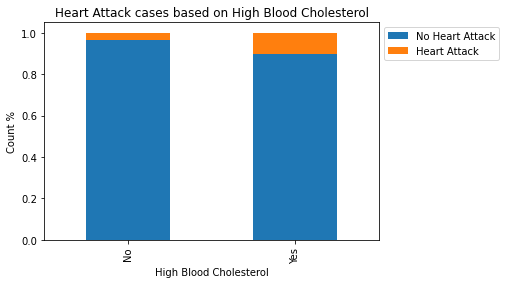

In [41]:
data_to_plot_percent3.plot(kind='bar',stacked=True).legend(["No Heart Attack", "Heart Attack"], loc='upper left', bbox_to_anchor=(1,1), ncol=1)
positions = (0, 1)
labels = ("No", "Yes")
plt.xticks(positions, labels)
plt.xlabel('High Blood Cholesterol')
plt.ylabel('Count %')
plt.title("Heart Attack cases based on High Blood Cholesterol")

plt.show()

In [42]:
# According to this dataset people with High Blood Cholesterol get more heart attacks than those with no High Blood Cholesterol

## Marital Status - Heart Attack Relationship

In [43]:
data['MARITAL'].replace(9, np.nan, inplace=True)

In [44]:
# See how many people have had heart attacks based on they marital status
plt.figure(figsize=(15,20))
df4 = data.groupby(['MARITAL','CVDINFR4']).size()

<Figure size 1080x1440 with 0 Axes>

In [45]:
data_to_plot4 = df4.unstack()

In [46]:
data_to_plot4

CVDINFR4,0,1
MARITAL,,
1.0,220534,11840
2.0,54599,4435
3.0,49580,6383
4.0,8258,627
5.0,65645,1722
6.0,12236,354


In [47]:
data_to_plot_transpose4 = data_to_plot4.transpose()

In [48]:
data_to_plot_transpose4

MARITAL,1.0,2.0,3.0,4.0,5.0,6.0
CVDINFR4,,,,,,
0,220534,54599,49580,8258,65645,12236
1,11840,4435,6383,627,1722,354


In [49]:
data_to_plot_transpose_percent4 = data_to_plot_transpose4.div(data_to_plot_transpose4.sum())

In [50]:
data_to_plot_transpose_percent4

MARITAL,1.0,2.0,3.0,4.0,5.0,6.0
CVDINFR4,,,,,,
0,0.949048,0.924874,0.885942,0.929432,0.974439,0.971882
1,0.050952,0.075126,0.114058,0.070568,0.025561,0.028118


In [51]:
data_to_plot_percent4 = data_to_plot_transpose_percent4.transpose()

In [52]:
data_to_plot_percent4

CVDINFR4,0,1
MARITAL,,
1.0,0.949048,0.050952
2.0,0.924874,0.075126
3.0,0.885942,0.114058
4.0,0.929432,0.070568
5.0,0.974439,0.025561
6.0,0.971882,0.028118


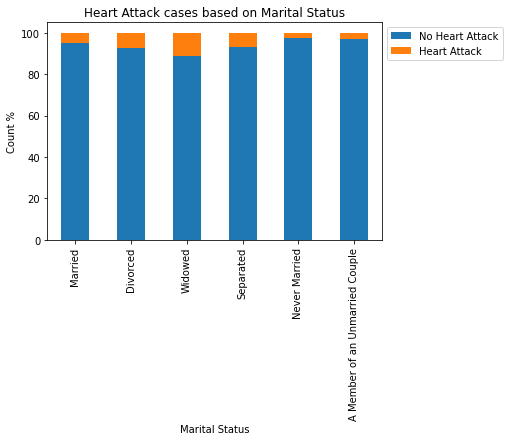

In [53]:
data_to_plot_percent4.apply(lambda x: x*100/sum(x), axis=1).plot(kind="bar", stacked=True).legend(["No Heart Attack", "Heart Attack"], loc='upper left', bbox_to_anchor=(1,1), ncol=1)
positions = (0, 1, 2, 3, 4, 5)
labels = ("Married", "Divorced", "Widowed", "Separated", "Never Married", "A Member of an Unmarried Couple")
plt.xticks(positions, labels)
plt.xlabel('Marital Status')
plt.ylabel('Count %')
plt.title("Heart Attack cases based on Marital Status")

plt.show()

In [54]:
# According to this dataset Widowed people suffer from heart attacks more, and Never Married people less. 

In [55]:
# Check ages for widowed people
'''
1 - Age 18 to 24
2 - Age 25 to 29
3 - Age 30 to 34
4 - Age 35 to 39
5 - Age 40 to 44
6 - Age 45 to 49
7 - Age 50 to 54
8 - Age 55 to 59
9 - Age 60 to 64
10 - Age 65 to 69
11 - Age 70 to 74
12 - Age 75 to 79
13 - Age 80 or older
14 - Don’t know/Refused/Missing
'''

data[data['MARITAL']==3]._AGEG5YR.value_counts()

13.0    21033
12.0     9821
11.0     8581
10.0     6759
9.0      4295
8.0      2445
7.0      1288
14.0      594
6.0       551
5.0       283
4.0       165
3.0        98
2.0        29
1.0        21
Name: _AGEG5YR, dtype: int64

In [56]:
# Conclusion: Widowed people are usually old

In [57]:
# Check ages for never married people
data[data['MARITAL']==5]._AGEG5YR.value_counts()

1.0     19342
2.0      9304
3.0      5993
8.0      4682
7.0      4671
9.0      4339
4.0      4197
6.0      3607
5.0      3351
10.0     3220
11.0     1865
13.0     1135
12.0     1056
14.0      605
Name: _AGEG5YR, dtype: int64

In [58]:
# Conclusion: Never married people are usually young